# Shaikh's real effective exchange rate
### Calculations on the real effectice exchange rate between japan and the US 

The goal is to reproduce figure 11.4 and 11.5 from the book "Capitalism - Competition, Conflict, Crises" 

The real effective exchange rate is calculated as the vertically integrated unit labor costs (vulc) times a factor of the share of exports (tau).

Theta can have the form of the share of exports over GDP (exp/gdp) or of consumer price index over producer price index (CPI/PPI)

Therefore: 

$ \frac{vulcr}{vulcr*} \cdot \frac{\tau}{\tau*}$

or equivalent

$ \frac{(\frac{ULC}{CPI})}{(\frac{ULC*}{CPI*})} \cdot \frac{(\frac{exp}{gdp})}{(\frac{exp*}{gdp*})}$

# import data

### Japan

In [1]:
import pandas as pd

In [2]:
exp_gdp = pd.read_csv("EXP-GDP/API_NE.EXP.GNFS.ZS_DS2_en_csv_v2_431603.csv",skiprows=3,delimiter=",")
exp_gdp.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.852913,71.820435,72.548690,72.252774,73.234592,55.32681,69.069709,83.124605,NaN,NaN
1,Africa Eastern and Southern,AFE,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.046024,23.249929,23.824897,25.315921,23.903124,22.03616,25.922406,27.595354,24.50316,NaN


In [3]:
# % share of Exports over GDP on a YEARLY basis // starting from 1960 to 2023
print(exp_gdp[exp_gdp["Country Code"] == "JPN"].columns)

exp_gdp_ss = exp_gdp[exp_gdp["Country Code"].isin(["JPN","USA"]) ].drop(
    ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 68'],axis=1).T.rename(
    columns={119:'jpn_exp_gdp',251:'usa_exp_gdp'})
print(len(exp_gdp_ss))
print(exp_gdp_ss.head(2))
print(exp_gdp_ss.tail(2))

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
64
      jpn_exp_gdp  usa_exp_gdp
1960          NaN          NaN
1961          NaN          NaN
      jpn_exp_gdp  usa_exp_gdp
2022    21.541723    11.633909
2023          NaN          NaN


### USD YEN FX Rate

In [4]:
# DAILY basis
usd_yen = pd.read_csv("FX-Rate-USD-YEN/dollar-yen-exchange-rate-historical-chart.csv",skiprows=15)
print(len(usd_yen))
print(usd_yen.head(2))

13784
         date   value
0  1971-01-04  357.73
1  1971-01-05  357.81


In [5]:
usd_yen["month"] = pd.to_datetime(usd_yen.date).dt.month
usd_yen["year"] = pd.to_datetime(usd_yen.date).dt.year
usd_yen.head(2)

,date,value,month,year
0,1971-01-04,357.73,1,1971
1,1971-01-05,357.81,1,1971


In [6]:
# YEARLY: 1970 to 2023
usd_yen_yearly = usd_yen.groupby("year").mean("value")
print(len(usd_yen_yearly))
print(usd_yen_yearly.head(2))
print(usd_yen_yearly.tail(2))

54
          value     month
year                     
1971  347.78569  6.456067
1972  303.12498  6.438247
           value     month
year                      
2023  140.734001  6.677019
2024  150.839595  2.765432


### JPN CPI (from World Bank, hence "wb")

In [7]:
# CPI from the world bank on a YEARLY basis // 1960 to 2022 // BASE = 2010

#jpn_cpi = pd.read_csv("JPN-CPI/API_FP.CPI.TOTL_DS2_en_csv_v2_527528-PERC-CHANGE/API_FP.CPI.TOTL_DS2_en_csv_v2_527528.csv",skiprows=3,delimiter=",")
jpn_cpi = pd.read_csv("JPN-CPI/API_FP.CPI.TOTL_DS2_en_csv_v2_1584217.csv",skiprows=3,delimiter=",")

# _wb = WORLD BANK

cpi_wb_ss = jpn_cpi[jpn_cpi["Country Code"].isin(["JPN","USA"]) ].drop(
    ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 68'],axis=1).T.rename(
    columns={119:'jpn_cpi_wb',251:'usa_cpi_wb'})

print(len(cpi_wb_ss))
print(cpi_wb_ss.head(2))
print(cpi_wb_ss.tail(2))

64
      jpn_cpi_wb  usa_cpi_wb
1960   18.972569   13.563061
1961   19.991104   13.708284
      jpn_cpi_wb  usa_cpi_wb
2022  107.839691  134.211206
2023  111.364036  139.735794


##### try us labour statistics example

In [8]:
cpi_wb_ss.loc["2000",["jpn_cpi_wb","usa_cpi_wb"]]

jpn_cpi_wb    102.667615
usa_cpi_wb     78.970721
Name: 2000, dtype: float64

In [9]:
cpi_wb_base_2000 = (cpi_wb_ss/cpi_wb_ss.loc["2000",["jpn_cpi_wb","usa_cpi_wb"]]) *100
print(cpi_wb_base_2000.diff().sum())
print(cpi_wb_ss.diff().sum())

jpn_cpi_wb     89.990858
usa_cpi_wb    159.771535
dtype: float64
jpn_cpi_wb     92.391467
usa_cpi_wb    126.172733
dtype: float64


### SIDENOTE: offset rebased time series by difference in the differences of the series
as it seems there is a rounding error in the rebased index

What I have tried at this point: 
- tutorial by office of labour statistics (us): https://www.bls.gov/cpi/factsheets/rebasing.htm
  - However, this in theory also leads to to just a time series that got divided by, in this case, the january 2015 index value (see chat gpt for the corresponding example)
  - or just try to divide any index number by january 2015 value

therefore, as it seems there is an round error issue here, since I have no other explanation

<Axes: >

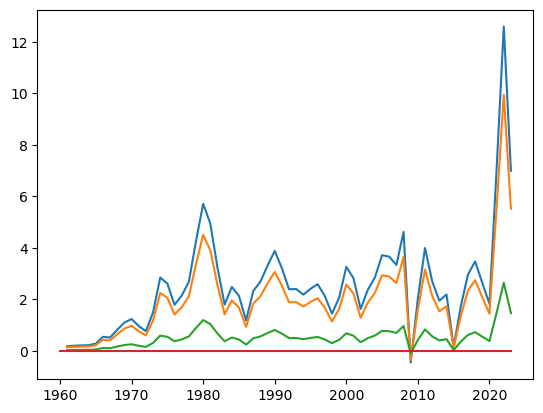

In [10]:
import numpy as np
cpi_wb_base_2000["zeros"] = np.zeros(len(cpi_wb_ss))

cpi_wb_base_2000["usa_cpi_wb"].diff().plot()
cpi_wb_ss["usa_cpi_wb"].diff().plot()
(cpi_wb_base_2000["usa_cpi_wb"].diff() - cpi_wb_ss["usa_cpi_wb"].diff()).plot()
cpi_wb_base_2000["zeros"].plot()

# looking at the figure below, it seems that the offset should be deducted from the base_2000 series, since the difference 
# is always positive

theoretically when deducting the difference of the differences from the "cpi_wb_base_2000" series, the differences should be gone. 

However, looking at the figure below, the differences (in green) are still not zero. 

In [11]:
# this is the offset time series
cpi_wb_base_2000_ = cpi_wb_base_2000 - (cpi_wb_base_2000.diff().shift(-1) - cpi_wb_ss.diff().shift(-1))


<Axes: >

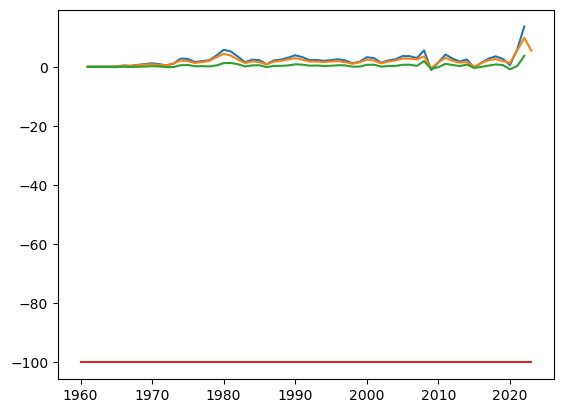

In [12]:
# blue: theory: index minus difference of difference will offset false difference
cpi_wb_base_2000_["usa_cpi_wb"].diff().plot()

# orange: comparison to baseline
cpi_wb_ss["usa_cpi_wb"].diff().plot()

# green: diff minus diff equals zero
(cpi_wb_base_2000_["usa_cpi_wb"].diff() - cpi_wb_ss["usa_cpi_wb"].diff()).plot()

# zero baseline
(cpi_wb_base_2000["zeros"]-100).plot()

<Axes: >

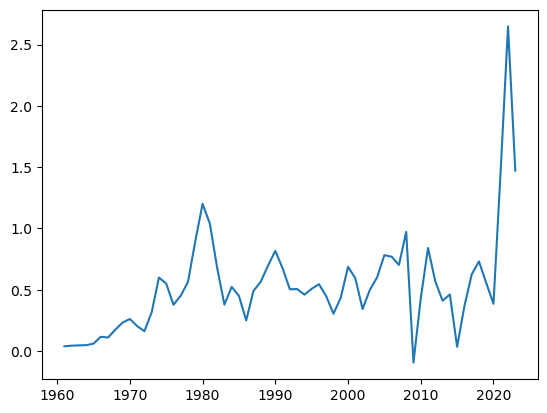

In [13]:
# DIFFERENCE SHOULD BE ZERO!
diffs_of_diffs=(cpi_wb_base_2000["usa_cpi_wb"].diff()-cpi_wb_ss["usa_cpi_wb"].diff())
diffs_of_diffs.plot()

In [14]:
# Notes for a chat gpt question

pd.DataFrame([cpi_wb_ss["usa_cpi_wb"][1:10],cpi_wb_base_2000["usa_cpi_wb"][1:10],
 cpi_wb_ss["usa_cpi_wb"].diff()[1:10],cpi_wb_base_2000["usa_cpi_wb"].diff()[1:10],
(cpi_wb_ss["usa_cpi_wb"].diff()[1:10] - cpi_wb_base_2000["usa_cpi_wb"].diff()[1:10]),
]).T

,usa_cpi_wb,usa_cpi_wb,usa_cpi_wb,usa_cpi_wb,usa_cpi_wb
1961,13.708284,17.358691,0.145223,0.183895,-0.038672
1962,13.872615,17.566783,0.164331,0.208091,-0.043760
1963,14.044590,17.784553,0.171975,0.217770,-0.045795
1964,14.224207,18.012002,0.179618,0.227449,-0.047831
1965,14.449685,18.297522,0.225478,0.285521,-0.060043
1966,14.885354,18.849206,0.435669,0.551684,-0.116015
1967,15.298093,19.371854,0.412739,0.522648,-0.109909
1968,15.951596,20.199381,0.653503,0.827526,-0.174023
1969,16.822934,21.302749,0.871338,1.103368,-0.232030


### JPN PPI 

In [15]:
# finished goods PPI from FRED  on a MONTHLY basis // 1960 to 2022 // BASE = 2015
jpn_ppi = pd.read_csv("JPN-PPI/PISPFG01JPM661N.csv")
jpn_ppi = jpn_ppi.rename(columns={'PISPFG01JPM661N':'jpn_ppi'})
print(len(jpn_ppi))
print(jpn_ppi.head(2))
print(jpn_ppi.tail(2))

748
         DATE  jpn_ppi
0  1960-01-01  62.8903
1  1960-02-01  62.8903
           DATE  jpn_ppi
746  2022-03-01     99.9
747  2022-04-01    100.7


In [16]:
jpn_ppi["date"] = pd.to_datetime(jpn_ppi.DATE).dt.strftime('%Y-%m')
jpn_ppi["year"] = pd.to_datetime(jpn_ppi.date).dt.year
jpn_ppi["month"] = pd.to_datetime(jpn_ppi.date).dt.month
jpn_ppi = jpn_ppi.set_index("date")

<Axes: xlabel='date'>

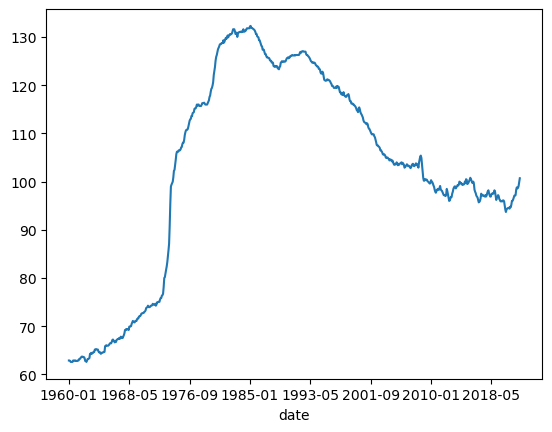

In [17]:
jpn_ppi["jpn_ppi"].plot()

In [18]:
jpn_ppi[jpn_ppi["year"] == 2015] 

,DATE,jpn_ppi,year,month
date,,,,
2015-01,2015-01-01,99.5,2015,1
2015-02,2015-02-01,99.6,2015,2
2015-03,2015-03-01,99.8,2015,3
2015-04,2015-04-01,100.1,2015,4
2015-05,2015-05-01,100.4,2015,5
2015-06,2015-06-01,100.8,2015,6
2015-07,2015-07-01,100.5,2015,7
2015-08,2015-08-01,100.2,2015,8
2015-09,2015-09-01,99.8,2015,9


In [19]:
# JPN PPI - YEARLY - 1960 to 2022 - BASE = 2015
jpn_ppi_yearly = jpn_ppi.groupby("year").mean("jpn_ppi").drop("month",axis=1)
#jpn_ppi_yearly.drop("month")
print(jpn_ppi_yearly.shape)
print(jpn_ppi_yearly.head(2))
print(jpn_ppi_yearly.tail(2))

(63, 1)
        jpn_ppi
year           
1960  62.774936
1961  63.203433
        jpn_ppi
year           
2021  96.833333
2022  99.600000


<Axes: xlabel='year'>

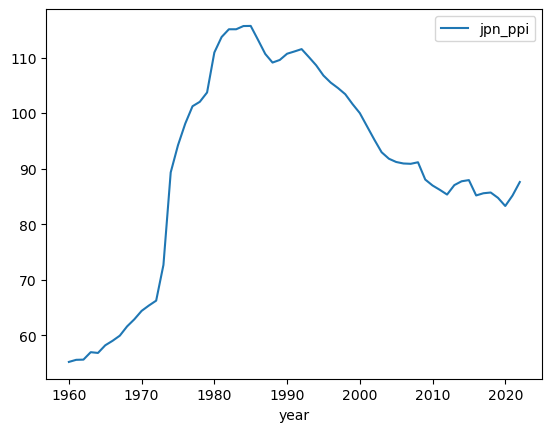

In [20]:
# rebase to 2000
jpn_ppi_yearly = (jpn_ppi_yearly / jpn_ppi_yearly.loc[2000]) * 100
jpn_ppi_yearly.plot()

### JPN ULC

In [21]:
# UNIT LABOR COSTS FROM FRED  1980 to 2023 // BASE = 2015
jpn_ulc = pd.read_csv("JPN-ULC/ULQECU01JPQ661S.csv")
jpn_ulc = jpn_ulc.rename(columns={'ULQECU01JPQ661S':'jpn_ulc'})
print(len(jpn_ulc))
print(jpn_ulc.head(2))
print(jpn_ulc.tail(2))

175
         DATE    jpn_ulc
0  1980-01-01  67.467467
1  1980-04-01  68.412182
           DATE     jpn_ulc
173  2023-04-01  107.630371
174  2023-07-01  107.373853


In [22]:
jpn_ulc["date"] = pd.to_datetime(jpn_ulc.DATE).dt.strftime('%Y-%m')
jpn_ulc["year"] = pd.to_datetime(jpn_ulc.date).dt.year
jpn_ulc["month"] = pd.to_datetime(jpn_ulc.date).dt.month
jpn_ulc = jpn_ulc.set_index("date")

In [23]:
jpn_ulc

,DATE,jpn_ulc,year,month
date,,,,
1980-01,1980-01-01,67.467467,1980,1
1980-04,1980-04-01,68.412182,1980,4
1980-07,1980-07-01,69.825397,1980,7
1980-10,1980-10-01,71.194260,1980,10
1981-01,1981-01-01,71.734394,1981,1
...,...,...,...,...
2022-07,2022-07-01,106.335674,2022,7
2022-10,2022-10-01,107.090846,2022,10
2023-01,2023-01-01,107.333578,2023,1


In [24]:
jpn_ulc[jpn_ulc.year == 2015]

,DATE,jpn_ulc,year,month
date,,,,
2015-01,2015-01-01,99.753560,2015,1
2015-04,2015-04-01,99.757552,2015,4
2015-07,2015-07-01,100.141589,2015,7
2015-10,2015-10-01,100.347299,2015,10


In [25]:
jpn_ulc_yearly = jpn_ulc.groupby("year").mean("jpn_ulc").drop("month",axis=1)
print(jpn_ulc_yearly.shape)
jpn_ulc_yearly.head(2)

(44, 1)


,jpn_ulc
year,
1980,69.224826
1981,73.788575


<Axes: xlabel='year'>

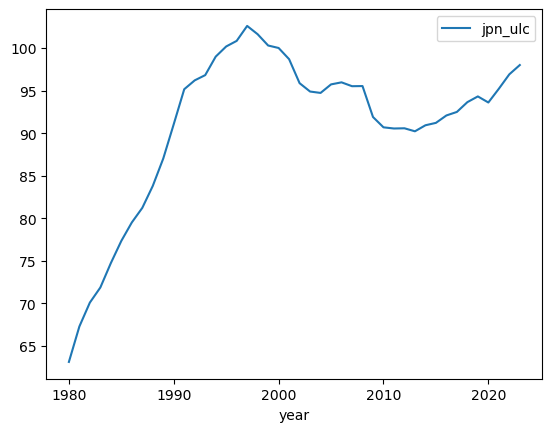

In [26]:
jpn_ulc_yearly = (jpn_ulc_yearly / jpn_ulc_yearly.loc[2000]) * 100
jpn_ulc_yearly.plot()

### United States

### US CPI
US CPI Time series selection from the file "cu.series". Basically it lists all the series  codes which time series does  mean what.

the following series is the most appropirate since it is us city average:

CUSR0000SA0      	0000	SA0	S	R	S	1982-84=100	All items in U.S. city average, all urban consumers, seasonally adjusted		1947	M01	2024	M05

In [27]:
us_cpi = pd.read_table("US-CPI/cu.data.1.AllItems",sep="\s+",engine='python')
print(len(us_cpi))
us_cpi.head(14)

61705


,series_id,year,period,value,footnote_codes
0,CUSR0000SA0,1947,M01,21.48,NaN
1,CUSR0000SA0,1947,M02,21.62,NaN
2,CUSR0000SA0,1947,M03,22.00,NaN
3,CUSR0000SA0,1947,M04,22.00,NaN
4,CUSR0000SA0,1947,M05,21.95,NaN
5,CUSR0000SA0,1947,M06,22.08,NaN
6,CUSR0000SA0,1947,M07,22.23,NaN
7,CUSR0000SA0,1947,M08,22.40,NaN
8,CUSR0000SA0,1947,M09,22.84,NaN
9,CUSR0000SA0,1947,M10,22.91,NaN


In [28]:
# avoided the wthiespace problem with an "\s+" import, meaning that all white spaces are explicitly used, not the first row only
print(us_cpi.columns)
#us_cpi_colnames = [colname.strip() for colname in list(us_cpi.columns.values)]
#us_cpi_colnames

Index(['series_id', 'year', 'period', 'value', 'footnote_codes'], dtype='object')


In [29]:
us_cpi_ss = us_cpi[us_cpi['series_id'] == 'CUSR0000SA0']
print(len(us_cpi_ss))
us_cpi_ss.head(14) # period of M13 sould be the yearly average 

# but since there is no M13, yearly average can be calculated

929


,series_id,year,period,value,footnote_codes
0,CUSR0000SA0,1947,M01,21.48,NaN
1,CUSR0000SA0,1947,M02,21.62,NaN
2,CUSR0000SA0,1947,M03,22.00,NaN
3,CUSR0000SA0,1947,M04,22.00,NaN
4,CUSR0000SA0,1947,M05,21.95,NaN
5,CUSR0000SA0,1947,M06,22.08,NaN
6,CUSR0000SA0,1947,M07,22.23,NaN
7,CUSR0000SA0,1947,M08,22.40,NaN
8,CUSR0000SA0,1947,M09,22.84,NaN
9,CUSR0000SA0,1947,M10,22.91,NaN


In [30]:
us_cpi_ss_yearly = us_cpi_ss.groupby("year").mean("value").drop("footnote_codes",axis=1)
print(len(us_cpi_ss_yearly))
print(us_cpi_ss_yearly.head(2))
print(us_cpi_ss_yearly.tail(2))

78
          value
year           
1947  22.331667
1948  24.045000
          value
year           
2023  304.70075
2024  311.88020


<Axes: xlabel='year'>

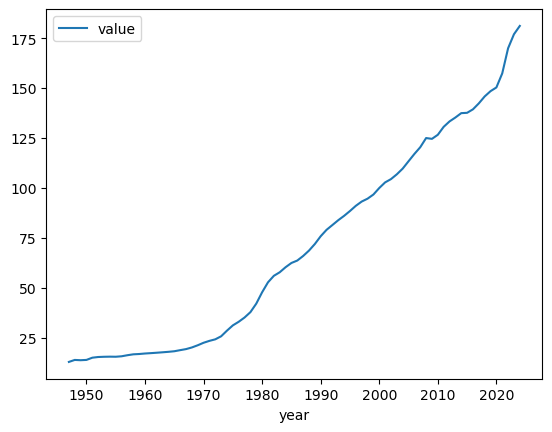

In [31]:
us_cpi_ss_yearly = (us_cpi_ss_yearly / us_cpi_ss_yearly.loc[2000]) * 100
us_cpi_ss_yearly.plot()

### US Producer Price Index 
the producer price index for the us does not have a total aggregate, however, the two series that fit the closest are the following: 

PCUOMFG--OMFG--               	OMFG--	OMFG--	U	198412	PPI industry group data for Total manufacturing industries, not seasonally adjusted		1984	M12	2024	M05

PCUOMIN--OMIN--               	OMIN--	OMIN--	U	198412	PPI industry group data for Total mining industries, not seasonally adjusted		1984	M12	2024	M05

In [32]:
us_ppi = pd.read_table("US-PPI/pc.data.01.aggregates",sep="\s+",engine='python')
print(us_ppi.columns)
print(us_ppi.iloc[3495,0],type(us_ppi.iloc[3495,0]))
us_ppi.tail(2)

Index(['series_id', 'year', 'period', 'value', 'footnote_codes'], dtype='object')
PCUOMIN--OMIN-- <class 'str'>


,series_id,year,period,value,footnote_codes
3495,PCUOMIN--OMIN--,2024,M04,224.344,P
3496,PCUOMIN--OMIN--,2024,M05,216.059,P


In [33]:
us_ppi_manufa = us_ppi[(us_ppi["period"]=="M13") & (us_ppi["series_id"]=="PCUOMFG--OMFG--")]
us_ppi_mining = us_ppi[(us_ppi["period"]=="M13") & (us_ppi["series_id"]=="PCUOMIN--OMIN--")]

In [34]:
us_ppi_manufa = us_ppi_manufa.set_index("year").drop(["series_id","period","footnote_codes"],axis=1).rename(columns={"value":"us_ppi_manufa"})
us_ppi_mining = us_ppi_mining.set_index("year").drop(["series_id","period","footnote_codes"],axis=1).rename(columns={"value":"us_ppi_mining"})

In [35]:
us_ppi_manufa = (us_ppi_manufa / us_ppi_manufa.loc[2000]) * 100
us_ppi_mining = (us_ppi_mining / us_ppi_mining.loc[2000]) * 100

<Axes: xlabel='year'>

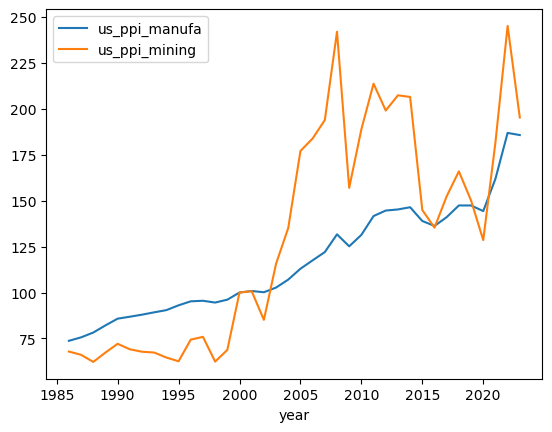

In [36]:
pd.concat([us_ppi_manufa,us_ppi_mining]).plot()

### Unit Labor Costs

for unit labor costs the following note is an example: 

PRS 3100 6 11 1 = PRs -3100 - 06 - 11 - 1

Series - Sector -Class Code - Mesaure Code - Time 

Selection for "Sector": 
 - 3000	Manufacturing	0	T	4
 - 3100	Manufacturing, Durable Goods	1	T	5
 - 3200	Manufacturing, Nondurable Goods	1	T	6
 - 8400	Business	0	T	2
 - 8500	Nonfarm Business	0	T	1
 - 8800	Nonfinancial Corporations	0	T	3

Selection for "Time"
 - 1	% Change same quarter 1 year ago	0	T	1
 - 2	% Change from previous quarter	0	T	2
 - 3	Index (2017=100)	0	T	3


Therefore: 
 - Sector: 8800
 - ClassCode: 3
 - Measure Code: 11
 - Time: 3 (index)

Therefore: PRS+8800 3 11 3

Sidenote:Q05	AN AV	Annual Average

In [37]:
us_ulc = pd.read_table("US-ULC/pr.data.1.AllData",sep="\s+",engine='python')
us_ulc.head(5)

,series_id,year,period,value,footnote_codes
0,PRS30006011,1988,Q01,1.9,None
1,PRS30006011,1988,Q02,2.2,None
2,PRS30006011,1988,Q03,1.9,None
3,PRS30006011,1988,Q04,1.1,None
4,PRS30006011,1988,Q05,1.8,None


In [38]:
us_ulc_ss = us_ulc[ (us_ulc["series_id"] == "PRS88003113" ) & (us_ulc["period"] == "Q05") ]
us_ulc_ss = us_ulc_ss.set_index("year").drop(["series_id","period","footnote_codes"],axis=1).rename(columns={"value":"us_ulc_ss"})
print(len(us_ulc_ss))
print(us_ulc_ss.head(2))
print(us_ulc_ss.tail(2))

77
      us_ulc_ss
year           
1947     19.089
1948     19.672
      us_ulc_ss
year           
2022    115.523
2023    119.319


<Axes: xlabel='year'>

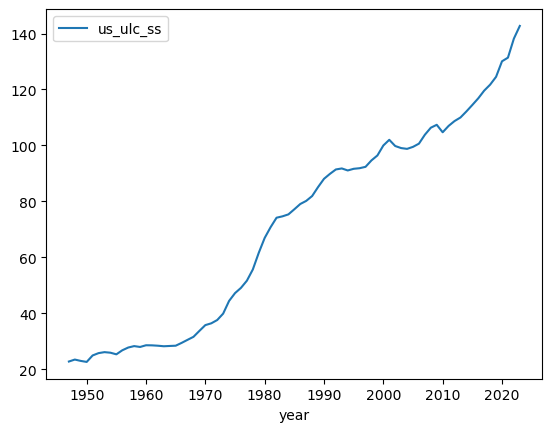

In [40]:
us_ulc_ss = (us_ulc_ss / us_ulc_ss.loc[2000]) * 100
us_ulc_ss.plot()

# CREATE FINAL GRAPH 

jpn_ulc/jpn_cpi

over

us_ulc/us_cpi

times 

jpn_cpi / jpn_ppi

over 

us_cpi / us_ppi

year
1986     73.707865
1987     75.580524
1988     78.202247
1989     82.097378
1990     85.767790
1991     86.816479
1992     87.940075
1993     89.213483
1994     90.411985
1995     93.033708
1996     95.205993
1997     95.505618
1998     94.531835
1999     96.104869
2000    100.000000
2001    100.823970
2002    100.149813
2003    102.696629
2004    107.041199
2005    112.958801
2006    117.528090
2007    122.022472
2008    131.685393
2009    125.168539
2010    131.385768
2011    141.647940
2012    144.644195
2013    145.243446
2014    146.441948
2015    138.951311
2016    136.254682
2017    141.048689
2018    147.415730
2019    147.415730
2020    144.344569
2021    161.937079
2022    186.921348
Name: us_ppi_manufa, dtype: float64

<Axes: xlabel='year'>

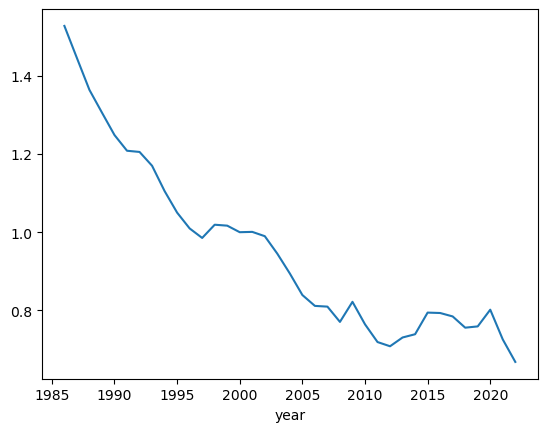

In [88]:
cpi_wb_base_2000.index = cpi_wb_base_2000.index.astype(int)
x = (
(jpn_ulc_yearly.loc[1980:2022,"jpn_ulc"] / cpi_wb_base_2000.loc[1980:2022,"jpn_cpi_wb"]) / 
 (us_ulc_ss.loc[1980:2022,"us_ulc_ss"] / us_cpi_ss_yearly.loc[1980:2022,"value"])
) * (
(cpi_wb_base_2000.loc[1980:2022,"jpn_cpi_wb"] / jpn_ppi_yearly.loc[1980:2022,"jpn_ppi"]) / 
(us_cpi_ss_yearly.loc[1980:2022,"value"] / us_ppi_manufa.loc[1980:2022,"us_ppi_manufa"])
)
(1/x).plot()


In [114]:
len(x)

43

<Axes: xlabel='year'>

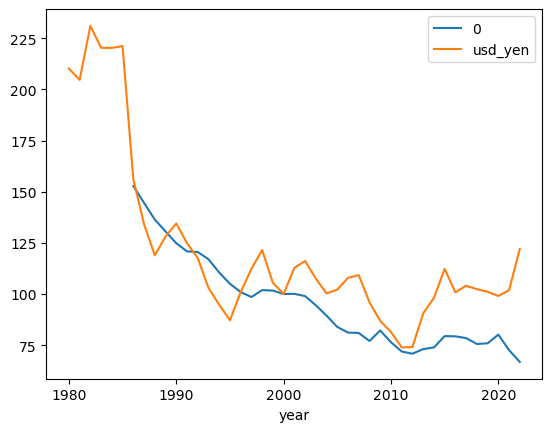

In [119]:
fig = pd.concat( [((1/x)*100),usd_yen_yearly.loc[1980:2022]] ,axis=1)
fig.plot()

<Axes: >

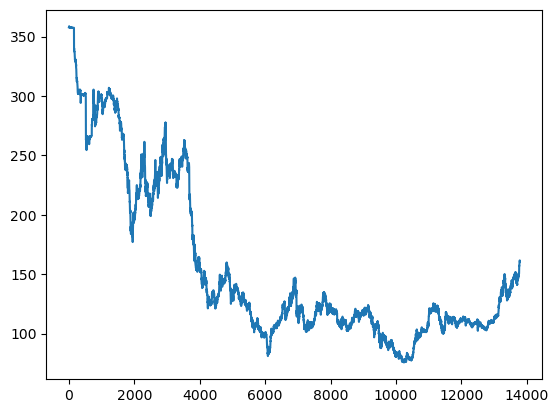

In [93]:
usd_yen[" value"].plot()

In [92]:
usd_yen.columns

Index(['date', ' value', 'month', 'year'], dtype='object')

In [ ]:
usd_yen_yearly = usd_yen.groupby("year").mean(" value").rename(columns={" value":"usd_yen"}).drop("month",axis=1)

In [120]:
usd_yen_yearly = (usd_yen_yearly / usd_yen_yearly.loc[2000])*100